In [522]:
import pandas as pd
import numpy as np

In [523]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [524]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [525]:
drop = ['PassengerId', 'Name', 'Ticket']
train = train.drop(drop, axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [526]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [527]:
train = train.replace({'Embarked':{'S': 0,'C': 1,'Q': 3}})
train = train.replace({'Sex':{'male': 0,'female': 1}})

median_embarked= train['Embarked'].median()
train['Embarked'].fillna(median_embarked, inplace=True)
print(median_embarked)
print(train)

0.0
     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0           0       3    0  22.0      1      0   7.2500   NaN       0.0
1           1       1    1  38.0      1      0  71.2833   C85       1.0
2           1       3    1  26.0      0      0   7.9250   NaN       0.0
3           1       1    1  35.0      1      0  53.1000  C123       0.0
4           0       3    0  35.0      0      0   8.0500   NaN       0.0
..        ...     ...  ...   ...    ...    ...      ...   ...       ...
886         0       2    0  27.0      0      0  13.0000   NaN       0.0
887         1       1    1  19.0      0      0  30.0000   B42       0.0
888         0       3    1   NaN      1      2  23.4500   NaN       0.0
889         1       1    0  26.0      0      0  30.0000  C148       1.0
890         0       3    0  32.0      0      0   7.7500   NaN       3.0

[891 rows x 9 columns]


In [528]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [529]:
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [530]:
train['Cabin_available'] = 0
train.loc[train['Cabin'].notna(), 'Cabin_available'] = 1
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_available
0,0,3,0,22.0,1,0,7.2500,NaN,0.0,0
1,1,1,1,38.0,1,0,71.2833,C85,1.0,1
2,1,3,1,26.0,0,0,7.9250,NaN,0.0,0
3,1,1,1,35.0,1,0,53.1000,C123,0.0,1
4,0,3,0,35.0,0,0,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,NaN,0.0,0
887,1,1,1,19.0,0,0,30.0000,B42,0.0,1
888,0,3,1,28.0,1,2,23.4500,NaN,0.0,0
889,1,1,0,26.0,0,0,30.0000,C148,1.0,1


In [531]:
train= train.drop('Cabin', axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_available
0,0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,1,38.0,1,0,71.2833,1.0,1
2,1,3,1,26.0,0,0,7.9250,0.0,0
3,1,1,1,35.0,1,0,53.1000,0.0,1
4,0,3,0,35.0,0,0,8.0500,0.0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,0
887,1,1,1,19.0,0,0,30.0000,0.0,1
888,0,3,1,28.0,1,2,23.4500,0.0,0
889,1,1,0,26.0,0,0,30.0000,1.0,1


In [532]:
train.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Cabin_available    0
dtype: int64

<Axes: >

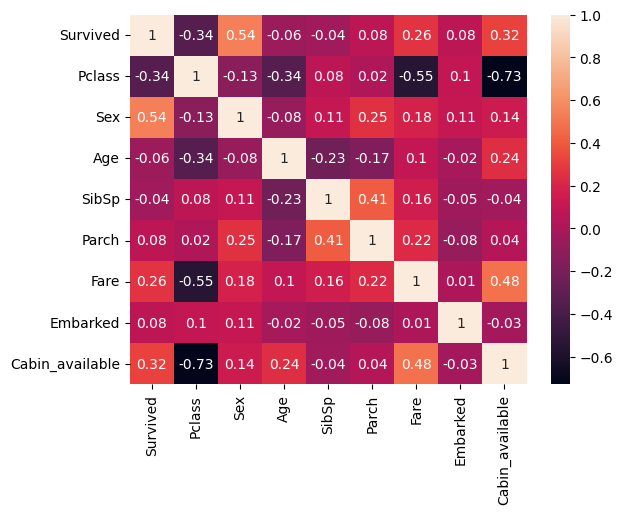

In [533]:
import seaborn as sns
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [534]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [535]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [536]:
print ("X_train shape", X_train.shape)
print ("y_train shape", y_train.shape)
print ("X_test shape", X_test.shape)
print ("y_test shape", y_test.shape)

X_train shape (623, 8)
y_train shape (623,)
X_test shape (268, 8)
y_test shape (268,)


In [537]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, y_train)

0.841091492776886

In [538]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, Y_pred)
print("MSE", MSE)

MSE 0.29850746268656714


In [539]:
drop = ['SibSp', 'Age']
train = train.drop(drop, axis=1)
train.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked,Cabin_available
0,0,3,0,0,7.2500,0.0,0
1,1,1,1,0,71.2833,1.0,1
2,1,3,1,0,7.9250,0.0,0
3,1,1,1,0,53.1000,0.0,1
4,0,3,0,0,8.0500,0.0,0


In [540]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [541]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [542]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, y_train)

0.8475120385232745

In [543]:
MSE = mean_squared_error(y_test, Y_pred)
print("MSE", MSE)

MSE 0.2462686567164179
